In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pwd

'/aiffel/aiffel'

In [3]:
train_data = pd.read_csv('transformer_chatbot/data/ChatbotData .csv')

In [4]:
train_data

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


## Data Information
챗봇 트레이닝용 문답 페어 11,876개
일상다반사 0, 이별(부정) 1, 사랑(긍정) 2로 레이블링

In [5]:
train_data['label'].unique()

array([0, 1, 2])

## 데이터가 결국 중복된게 많다.

In [6]:
train_data.nunique()

Q        11662
A         7779
label        3
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

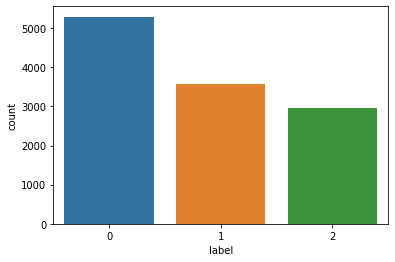

In [7]:
sns.countplot(x = train_data['label'], data = train_data)

## countplot 확인 결과
일상 > 부정 > 긍정 순으로 답변한 데이터의 그래프 확인

In [8]:
print(train_data.isnull().sum())

Q        0
A        0
label    0
dtype: int64


In [9]:
contatins_q_df = train_data[train_data['Q'].str.contains(r'(ㅋ{2,}|ㅎ{2,}|ㅜ{2,}|ㅠ{2,})')]
contatins_a_df = train_data[train_data['A'].str.contains(r'(ㅋ{2,}|ㅎ{2,}|ㅜ{2,}|ㅠ{2,})')]
display(contatins_q_df)
display(contatins_a_df)

/tmp/ipykernel_794/2794573382.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  contatins_q_df = train_data[train_data['Q'].str.contains(r'(ㅋ{2,}|ㅎ{2,}|ㅜ{2,}|ㅠ{2,})')]
/tmp/ipykernel_794/2794573382.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  contatins_a_df = train_data[train_data['A'].str.contains(r'(ㅋ{2,}|ㅎ{2,}|ㅜ{2,}|ㅠ{2,})')]


,Q,A,label
7,SNS 맞팔 왜 안하지ㅠㅠ,잘 모르고 있을 수도 있어요.,0
211,공무원 시험 힘들어ㅠㅠ,철밥통 되기가 어디 쉽겠어요.,0
1153,단둘이는 처음 만나는 날ㅋㅋ,서로를 아는 좋은 기회가 되겠네요.,0
2104,보일러 틀고 나갔어ㅠㅠ,이번달 난방비가 많이 나오겠네요.,0
2229,비트코인 ㅜㅜ,안타깝지만 잊어버리세요.,0
2936,안경 벗었는데 차이가 없어ㅋㅋ,이게 정상이죠.,0
5240,회식 좀 그만 했으면ㅜㅜ,가기 싫어도 가야겠죠.,0
5738,꿈ㅠㅠ,꿈에 나왔나요.,1
5786,나만 구질하게.ㅜㅜ,구질구질해도 괜찮아요.,1
5811,난 또 바보ㅠㅠ,바보를 사랑하는 사람이 있을 거예요.,1


,Q,A,label
8815,휴우.,휴우ㅠㅠ,1


## 데이터 확인 2
- 사람이라면 ㅋㅋ, ㅎㅎ, ㅜㅜ, ㅠㅠ 등을 여러번 꾹 눌러서 썼을 경우가 많은데 데이터에서는 평균2번, 최대 3번을 사용 하였기에
    이미 데이터가 처리 되었다는 것으로 간주 하겠습니다.

## 데이터 전처리

### Q와 A 데이터 분할 및 구두점에 대해서 띄어 쓰기

In [10]:
questions = []
for sentence in train_data['Q']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)

In [11]:
answers = []
for sentence in train_data['A']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

In [12]:
print(questions[:5])

['12시 땡 !', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네']


In [13]:
print(answers[:5])

['하루가 또 가네요 .', '위로해 드립니다 .', '여행은 언제나 좋죠 .', '여행은 언제나 좋죠 .', '눈살이 찌푸려지죠 .']


In [14]:
print(f"질문 : {questions[20]}\n"
      f"답변 : {answers[20]}")

질문 : 가스비 비싼데 감기 걸리겠어
답변 : 따뜻하게 사세요 !


## 토큰화 진행하기

In [15]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size = 2 ** 13)

In [16]:
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

In [17]:
VOCAB_SIZE = tokenizer.vocab_size + 2

In [18]:
# target_vocab_size가 2^13인 경우에도 원래 8172가 나와야 하는데
# 사용된 단어 수가 더 많아서 크기가 증가한다고 합니다.
print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

시작 토큰 번호 : [8178]
종료 토큰 번호 : [8179]
단어 집합의 크기 : 8180


In [19]:
# 서브워드텍스트인코더 토크나이저의 .encode()를 사용하여 텍스트 시퀀스를 정수 시퀀스로 변환.
print(f'Tokenized sample question: {tokenizer.encode(questions[20])}')
print(f'Tokenized sample answers: {tokenizer.encode(answers[20])}')

Tokenized sample question: [5766, 611, 3509, 141, 685, 3747, 849]
Tokenized sample answers: [2343, 514, 41]


In [20]:
# 서브워드텍스트인코더 토크나이저의 .encode()와 decode() 테스트해보기

# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[100]

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print(f'정수 인코딩 : {tokenized_string}')

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print (f'기존 문장: {original_string}')

정수 인코딩 : [1941, 460]
기존 문장: 거지됐어


In [21]:
for ts in tokenized_string:
  print (f'{ts} ----> {tokenizer.decode([ts])}')

1941 ----> 거지
460 ----> 됐어


In [22]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)
  
  # 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs

In [23]:
questions, answers = tokenize_and_filter(questions, answers)

In [24]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

질문 데이터의 크기(shape) : (11823, 40)
답변 데이터의 크기(shape) : (11823, 40)


In [25]:
# 0번째 샘플을 임의로 출력
print(questions[0])
print(answers[0])

[8178 7915 4207 3060   41 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


\[8178 7915 4207 3060   41 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0\]
이 부분을 보면 start 부분인 8178과 끝나는 부분인 8179 안에 내용물들의 정수들이 들어있고, 최대문장 길이를 40으로 주었기때문에 나머지 0들은 padding 값이다.

In [26]:
print('단어 집합의 크기(Vocab size): {}'.format(VOCAB_SIZE))
print('전체 샘플의 수(Number of samples): {}'.format(len(questions)))

단어 집합의 크기(Vocab size): 8180
전체 샘플의 수(Number of samples): 11823


In [27]:
# 텐서플로우 dataset을 이용하여 셔플(shuffle)을 수행하되, 배치 크기로 데이터를 묶는다.
# 또한 이 과정에서 교사 강요(teacher forcing)을 사용하기 위해서 디코더의 입력과 실제값 시퀀스를 구성한다.
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1] # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [28]:
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(answers[0]) # 기존 샘플
print(answers[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 39가 된다.
print(answers[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 역시 39가 된다.

[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]
[[3844   74 7894    1 8179    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


In [29]:
class PositionalEncoding(tf.keras.layers.Layer):
  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])

    # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    angle_rads = np.zeros(angle_rads.shape)
    angle_rads[:, 0::2] = sines
    angle_rads[:, 1::2] = cosines
    pos_encoding = tf.constant(angle_rads)
    pos_encoding = pos_encoding[tf.newaxis, ...]

    print(pos_encoding.shape)
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

In [30]:
def scaled_dot_product_attention(query, key, value, mask):
  # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
  # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
  # padding_mask : (batch_size, 1, 1, key의 문장 길이)

  # Q와 K의 곱. 어텐션 스코어 행렬.
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 스케일링
  # dk의 루트값으로 나눠준다.
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
  # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
  if mask is not None:
    logits += (mask * -1e9)

  # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
  # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  output = tf.matmul(attention_weights, value)

  return output, attention_weights

In [31]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    # d_model을 num_heads로 나눈 값.
    # 논문 기준 : 64
    self.depth = d_model // self.num_heads

    # WQ, WK, WV에 해당하는 밀집층 정의
    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    # WO에 해당하는 밀집층 정의
    self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # 1. WQ, WK, WV에 해당하는 밀집층 지나기
    # q : (batch_size, query의 문장 길이, d_model)
    # k : (batch_size, key의 문장 길이, d_model)
    # v : (batch_size, value의 문장 길이, d_model)
    # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 2. 헤드 나누기
    # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
    # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
    # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 4. 헤드 연결(concatenate)하기
    # (batch_size, query의 문장 길이, d_model)
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 5. WO에 해당하는 밀집층 지나기
    # (batch_size, query의 문장 길이, d_model)
    outputs = self.dense(concat_attention)

    return outputs

In [32]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, key의 문장 길이)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [33]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': padding_mask # 패딩 마스크 사용
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [34]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 인코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [35]:
# 디코더의 첫번째 서브층(sublayer)에서 미래 토큰을 Mask하는 함수
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
  return tf.maximum(look_ahead_mask, padding_mask)

In [36]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': look_ahead_mask # 룩어헤드 마스크
      })

  # 잔차 연결과 층 정규화
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
          'mask': padding_mask # 패딩 마스크
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [37]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 디코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [38]:
def transformer(vocab_size, num_layers, dff,
                d_model, num_heads, dropout,
                name="transformer"):

  # 인코더의 입력
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 디코더의 입력
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더의 패딩 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더의 룩어헤드 마스크(첫번째 서브층)
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask, output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 디코더의 패딩 마스크(두번째 서브층)
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
  enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

  # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
  dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 다음 단어 예측을 위한 출력층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

(1, 9000, 128)
(1, 9000, 128)


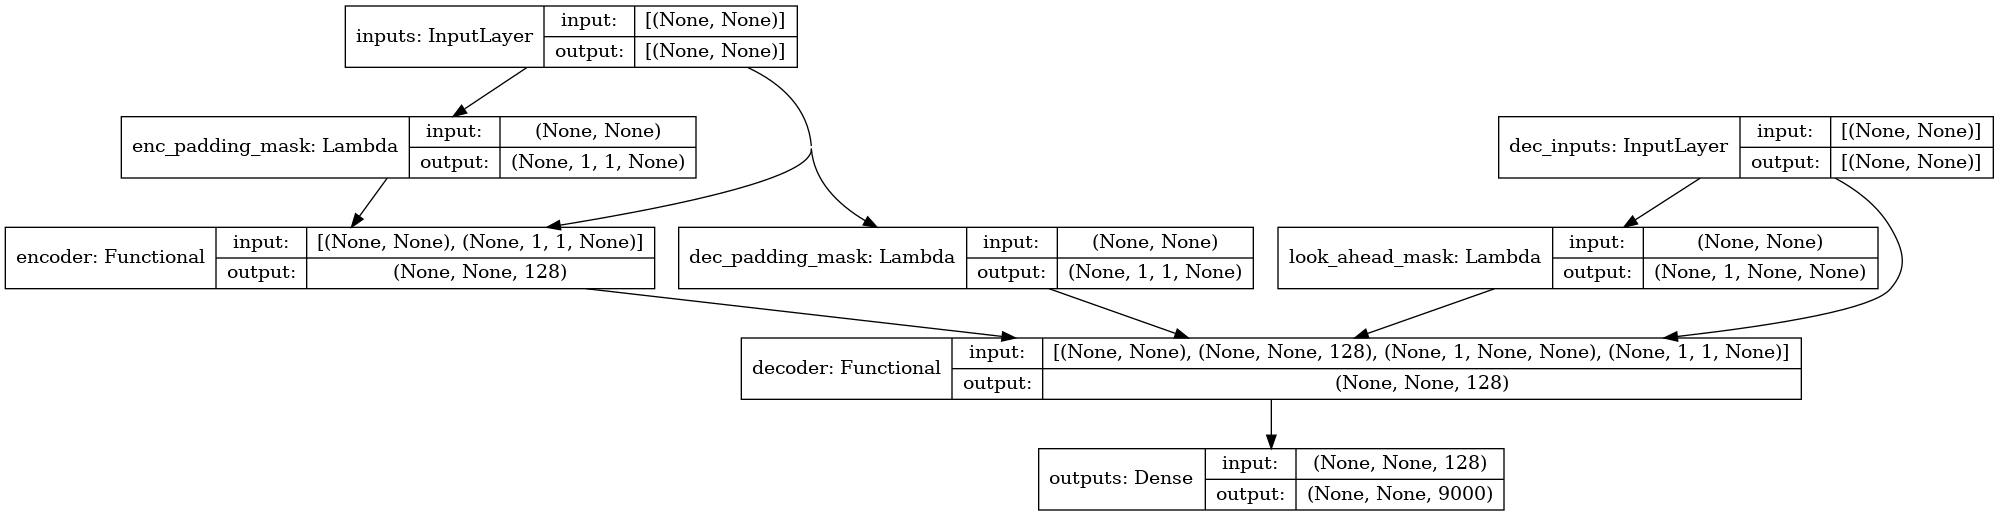

In [39]:
small_transformer = transformer(
    vocab_size = 9000,
    num_layers = 4,
    dff = 512,
    d_model = 128,
    num_heads = 4,
    dropout = 0.3,
    name="small_transformer")

tf.keras.utils.plot_model(
    small_transformer, to_file='small_transformer.png', show_shapes=True)

In [40]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

In [41]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

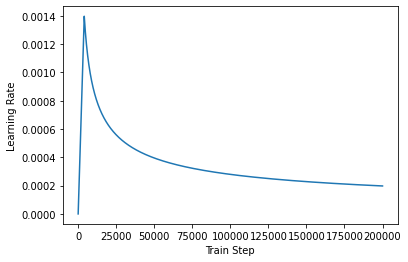

In [42]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [43]:
tf.keras.backend.clear_session()

# Hyper-parameters
NUM_LAYERS = 2
D_MODEL = 256
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

(1, 8180, 256)
(1, 8180, 256)


In [44]:
MAX_LENGTH = 40

learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  # ensure labels have shape (batch_size, MAX_LENGTH - 1)
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [45]:
EPOCHS = 50

model.fit(dataset, epochs=EPOCHS)

Epoch 1/50
185/185 [==============================] - 17s 57ms/step - loss: 1.4506 - accuracy: 0.0302
Epoch 2/50
185/185 [==============================] - 10s 57ms/step - loss: 1.1756 - accuracy: 0.0494
Epoch 3/50
185/185 [==============================] - 10s 56ms/step - loss: 1.0050 - accuracy: 0.0506
Epoch 4/50
185/185 [==============================] - 10s 55ms/step - loss: 0.9278 - accuracy: 0.0544
Epoch 5/50
185/185 [==============================] - 10s 55ms/step - loss: 0.8703 - accuracy: 0.0578
Epoch 6/50
185/185 [==============================] - 10s 55ms/step - loss: 0.8105 - accuracy: 0.0620
Epoch 7/50
185/185 [==============================] - 10s 55ms/step - loss: 0.7442 - accuracy: 0.0680
Epoch 8/50
185/185 [==============================] - 10s 55ms/step - loss: 0.6710 - accuracy: 0.0757
Epoch 9/50
185/185 [==============================] - 10s 55ms/step - loss: 0.5911 - accuracy: 0.0845
Epoch 10/50
185/185 [==============================] - 10s 56ms/step - loss: 0.509

In [46]:
def evaluate(sentence):
  sentence = preprocess_sentence(sentence)

  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # 현재(마지막) 시점의 예측 단어를 받아온다.
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 마지막 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 마지막 시점의 예측 단어를 출력에 연결한다.
    # 이는 for문을 통해서 디코더의 입력으로 사용될 예정이다.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)


def predict(sentence):
  prediction = evaluate(sentence)

  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence

In [47]:
def preprocess_sentence(sentence):
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = sentence.strip()
  return sentence

In [48]:
output = predict('영화 볼래?')

Input: 영화 볼래?
Output: 최신 영화가 좋을 것 같아요 .


In [49]:
output = predict('넌 인생이 살만하니?')

Input: 넌 인생이 살만하니?
Output: 단맛도 있을 거예요 .


In [50]:
output = predict('좋아하는 사람은 있니?')

Input: 좋아하는 사람은 있니?
Output: 잘 살고 있어요 .


In [57]:
output = predict('세계를 떠나면 어떨 것 같아')

Input: 세계를 떠나면 어떨 것 같아
Output: 그 누구와도 비교하지 마세요 .


In [56]:
output = predict('생일 축하해줘')

Input: 생일 축하해줘
Output: 네 말씀해주세요 .


In [58]:
output = predict('넌 너무 고리타분 한 것 같아')

Input: 넌 너무 고리타분 한 것 같아
Output: 사람들이 공감할 거예요 .


In [59]:
output = predict('인생이 쓰다.')

Input: 인생이 쓰다.
Output: 단맛도 있을 거예요 .


In [61]:
train_data[train_data['A'].str.contains('단맛')]

,Q,A,label
1843,뭔가 뒷맛이 쓰다,단맛도 있을 거예요.,0
3766,인생 공부한건가,단맛도 있을 거예요.,0
3774,인생의 쓴맛,단맛도 있을 거예요.,0
3775,인생이 쓰디쓰다,단맛도 있을 거예요.,0


In [65]:
output = predict('공부.')

Input: 공부.
Output: 인연이 거기까지 였나봐요 .


In [66]:
train_data[train_data['A'].str.contains('인연이')]

,Q,A,label
3777,인연은 소중한 거지,옷깃만 스쳐도 인연이죠.,0
3778,인연은 항상 소중한 거겠지,옷깃만 스쳐도 인연이죠.,0
5314,2년 6개월 이렇게 끝나네,인연이 여기까지였나봅니다.,1
5317,2년 다되가는 연애 끝.,인연이 거기까지였나봐요.,1
5357,45일만에 진짜 헤어지네,인연이 거기까지였나봐요.,1
5496,결국 여친이 헤어지자 하네.,인연이 거기까지 였나봐요.,1
5781,나를 사랑하지 않는다네,인연이 거기까지인가봐요.,1
6033,다른 사람에게 뺏긴거 같네.,인연이 여기까지였나봐요.,1
6061,다시 헤어졌습니다.,인연이 거기까지였나봐요.,1
6207,마음이 완전히 식은 남자,인연이 거기까지인가봐요. 마음의 준비를 하세요.,1


In [69]:
output = predict('김민기라고 아니?')

Input: 김민기라고 아니?
Output: 꼬박꼬박 챙겨 드세요 .


In [70]:
train_data[train_data['A'].str.contains('꼬박꼬박')] #??? 뭐지??

,Q,A,label
2225,비타민 먹어야지,꼬박꼬박 챙겨 드세요.,0
2226,비타민 사서 먹어야겠다.,꼬박꼬박 챙겨 드세요.,0
3008,약 먹고 나아야지,꼬박꼬박 챙겨 드세요.,0
3010,약 챙겨 먹어야지,꼬박꼬박 챙겨 드세요.,0


In [75]:
train_data[train_data['Q'].str.contains('김')] #??? 뭐지??

,Q,A,label
413,김떡순 먹고 싶어.,건강을 위해 조금씩 드세요.,0
414,김치도 없네,마트 갑시다.,0
415,김치볶음밥 먹어야지,맛있는 식사시간 되시길 바랄게요.,0
416,김치볶음밥이나 만들어 먹어야지,맛있는 식사시간 되시길 바랄게요.,0
417,김치찌개 먹고 싶어,맛있죠!,0
748,남자친구가 홧김에 욕함,순간 실수할 수 있겠다 판단되면 용서하고 기회를 주세요.,0
922,냉장고에 김치도 없네,마트 갑시다.,0
4439,참치김치찌개 먹고 싶어.,맛있죠!,0
4836,튀김기 사고 싶다,몇 번 안해먹고 둘 거면 그냥 사 드세요.,0
5420,jk김동욱 노래 생각나네,가사가 비슷한가봐요.,1


In [76]:
output = predict('최강훈이라고 아니?')

Input: 최강훈이라고 아니?
Output: 하고 안하고는 집주인 마음이죠 .


In [77]:
output = predict('최강훈')

Input: 최강훈
Output: 변화 가능성을 생각해보세요 .


## 민기님과 비교를 해보았습니다.
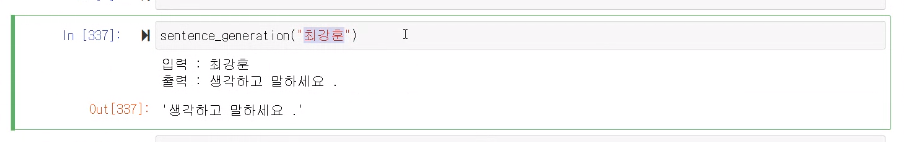

In [78]:
output = predict('김승순')

Input: 김승순
Output: 혼자만의 시간이 많아지죠 .


In [79]:
output = predict('김승순이라고 아니?') # 어 승순님.. 비 흡연자이신데? 설마.. 프로그램을 다니셨나?

Input: 김승순이라고 아니?
Output: 금연 프로그램을 소개해보세요 .


In [80]:
output = predict('이상원') # 왜 상원님은 좋은 것만 나오시죠?

Input: 이상원
Output: 돈 없어도 할 수 있는게 많아요


In [81]:
output = predict('이상원이라고 아니?') # 상원님 나 안좋아해요?

Input: 이상원이라고 아니?
Output: 그 사람도 당신을 좋아하길 바랍니다 .


In [82]:
output = predict('이슬') # 

Input: 이슬
Output: 금방 지나갈 거예요 .


In [83]:
output = predict('이슬이라고 아니?')

Input: 이슬이라고 아니?
Output: 서로에게 부담 없는 작은 선물이 좋아요 .


In [84]:
output = predict('나와 그녀의 취미가 하나도 맞지않아')

Input: 나와 그녀의 취미가 하나도 맞지않아
Output: 복잡한 심경인가봐요 .


In [85]:
output = predict('나 담배 끊을 수 있을까?')

Input: 나 담배 끊을 수 있을까?
Output: 당신을 인정해줄 곳을 찾아보세요 .


In [86]:
train_data[train_data['A'].str.contains('당신을 인정')] # 맞나?

,Q,A,label
1208,대우가 별로야,당신을 인정해줄 곳을 찾아보세요.,0
1209,대우를 안해줘,당신을 인정해줄 곳을 찾아보세요.,0


In [88]:
output = predict('게임을 끊어야 하는데') # 하지... 마세요?

Input: 게임을 끊어야 하는데
Output: 마세요 .


## 회고
NLP는 역시나 너무 어려웠고, CV에 익숙해져서 그런지 무슨 원리인지 하나도 이해를 하지 못했다.
그래서 기초적인 토크나이저와 정수인코딩 부분을 다시한번 공부를 해봤던 것 같다.
노드나 깃허브 등등 다양한곳에서 계속 데이터 부분을 이후에 쓰고 그전에 포지셔널 인코딩과 인코더 디코더들을 계속 먼저 함수 정의를해서
머리가 지끈했는데, 반대로 생각해서 데이터를 먼저 전처리하는것을 하고났더니 이후에 마음이 편안한 점이 있었다.
민기님과 이야기를 나누면서 서로 학습한 모델의 결과로 재미있게 수다를 떨었다. 즐거웠다. 민기님 꼬박꼬박 챙겨드세요 ^^

오늘 이슬님과 더 친해진거 같아서 좋은 하루 였습니다. 하하

- K
    - 이해를 못했기 때문에, 데이터 전처리 부터 정리 한 점
    - 그루 분과 학습된 데이터로 결과를 보면서 이야기 나눈 점
- P
    - 이해를 하나도 하지 못했습니다.
    - csv 파일에 뜬금없이 스페이스바 한번있어서 데이터가 안불러와졌습니다. 다른사람들은 다 홈페이지링크로 해결했더군요
- T
    - 기초부터 다시 봐서 노드의 일부분만이라도 이해를 했답니다.
    - 저는 개빡쳐서 스페이스바있는거 발견하고 해결했습니다. 진짜 막 os.chdir(), os.getcwd(), pwd, os.dirlist() 쓰면서 찾아봤었습니다.